# Comment construire un ANN (Artificial Neural Network) par l'exemple !

Contexte = une banque de la place veut comprendre pourquoi ses clients quittent la banque

Motvation = et veux savoir le type de clients qui quittent la banque pour mieux prendre soin d'eux

Donnees = la banque nous fournit un echantillon de sa BD sur 6 mois comptant pres de 10 000 clients sous forme d'un fichier excel 

Travail a faire = proposer une solution a base de ANN pour predire si un client quitteras la banque dans 6 mois ou pas

## 1- Installation des modules et importation des librairies

Theamo  = pour le calcul parallele (utilise le CPU et le GPU du pc) = moteur de calcul pour le DL

Tensorflow = modele de calcul numerique, pour recode de nouveaux reseaux a partir de fonctions de base existante

Keras = Theamo + Tensorflow, nous evite de tout refaire

### Importing the libraries

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf

2021-12-22 16:18:45.870086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 16:18:45.870162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [22]:
# Importing of the dataset

dataset = pd.read_csv('/home/ther/LAB/Deep_Learning_from_A_to_Z/ANN_Temporal_Lobe/Churn_Modelling.csv')

In [23]:
# The first visualisation of the dataset

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
# Creation of the Matrix of the independante variable (Y = B + AX)

X = dataset.iloc[:, [2,3]].values  # Surname and credit scoring
y = dataset.iloc[:, 4].values    # Country

In [80]:
print("X = \n",X, "\n\n")
print("y = \t",y)

X = 
 [['Hargrave' 619]
 ['Hill' 608]
 ['Onio' 502]
 ...
 ['Liu' 709]
 ['Sabbatini' 772]
 ['Walker' 792]] 


y = 	 ['France' 'Spain' 'France' ... 'France' 'Germany' 'France']


In [81]:
# Creation of the Matrix of the independante variable (Y = B + AX) same that the previous one

X = dataset.iloc[:, 3:-1].values  # Surname and credit scorint 
y = dataset.iloc[:, -1].values    # Country

In [82]:
print("X = \n",X, "\n\n")
print("y = \t",y)

X = 
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] 


y = 	 [1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "GENDER" and the "GEOGRAPHY" column

In [35]:
# The gender

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [40]:
print("for X = GENDER we have \n ", X , "\n\n")

for X = GENDER we have 
  [[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]] 




In [41]:
# The Geography

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [42]:
print("for X = GEOGRAPHY, we have \n", X , "\n\n")

for X = GEOGRAPHY, we have 
 [[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]] 




### Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [44]:
#change the scale of variables to avoid one variable dominating the other 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [45]:
ann = tf.keras.models.Sequential()

2021-12-22 16:59:30.018018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-22 16:59:30.018084: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-22 16:59:30.018140: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ther-ThinkPad-T530): /proc/driver/nvidia/version does not exist


### Adding the input layer and the first hidden layer

In [46]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [47]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [48]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [49]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [50]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5053 - accuracy: 0.7801
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7955
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7925
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8043
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8235
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8340
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8395
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8418
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8420
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3612 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8624
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8608
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8627
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8618
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8630
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8620
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8630
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8644
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8637
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation


Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [58]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000,0,0]])) > 0.5)

[[False]]


### Predicting the Test set results

In [59]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [63]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 194  211]]


In [66]:
accuracy_score(y_test, y_pred)

0.8685

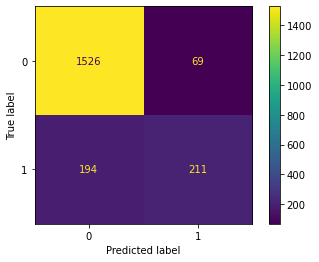

In [68]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()